<a href="https://colab.research.google.com/github/Heemang221/covid19/blob/master/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
# The SIR model differential equations.
def deriv(state, t, N, sigma,beta, gamma):
    S, E, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

In [ ]:
RO = 1.9944
latent_period = 1/3.67
effective_contact_rate = 0.093 #RO * recovery_rate #transmission rate * contact rate (감염확률 * 접촉수)
recovery_rate = 1/14

# We'll compute this for fun
print("R0 is", 1.31)

# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 13351891
exposed = 19 #유일하게 정확하지 않은 값.
recovered = 1490
infected = 1687
susceptible = total_pop - infected - recovered - exposed

# A list of days, 0-120
days = range(0, 55)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'exposed':E,
    'infected': I,
    'recovered': R,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'exposed','suseptible', 'recovered'],
        color=['#bb6424','#ffffff', '#aac6ca', '#cc8ac0'],
        kind='area',
        stacked=False)

In [ ]:
filename = '/content/date.csv'
df3 = pd.read_csv(filename, header=0)
df3.head()
df3 = df3.loc[:, ['days', 'acc_count']]
df3.head()

FileNotFoundError: ignored

In [ ]:
# Build a dataframe because why not

df2 = pd.DataFrame({
    'infected': I,
    'days': days
})

df2.head()

dfdf = pd.merge(df2, df3, on="days")
dfdf.head()
df.tail()

NameError: ignored

In [ ]:
plt.style.use('ggplot')
dfdf.plot(x= 'days',
        y=['infected', 'acc_count'],
        color=['#bb6424','#ffffff'],
        kind='area',
        stacked=False)

NameError: ignored

In [ ]:
## 최소제곱법

xData = dfdf['acc_count']
yData = dfdf['acc_count'] - dfdf['infected']

xAvg = np.mean(xData)
yAvg = np.mean(yData)

print("x 평균", xAvg)
print("y 평균", yAvg)

In [ ]:
# 분모
divisor = sum([(i - xAvg) ** 2 for i in xData])

# 분자
dividend = 0
for i in range(len(xData)):
    dividend += (xData[i] - xAvg) * (yData[i] - yAvg)

#기울기
a = dividend / divisor
#y 절편
b = yAvg - (xAvg * a)

print("분자", divisor)
print("분모", dividend)
print("기울기", a)
print("y절편", b)

NameError: ignored

In [ ]:
#감염자만 보기

def adjust_rate(contact_rate, day):
    if day > 0:
        return contact_rate
    else:
        return contact_rate

# The SIR model differential equations.
def deriv_adjusted(state, t, N, sigma, beta, gamma):
    S, E, I, R = state
    
    beta = adjust_rate(beta, t)
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

R0 is 3.1444


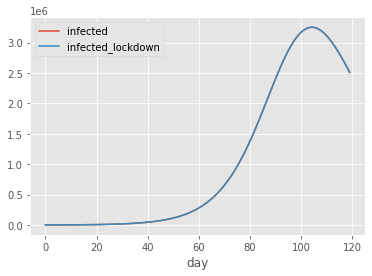

In [ ]:
latent_period = 1/4
effective_contact_rate = 0.2246
recovery_rate = 1/14

# We'll compute this for fun
print("R0 is", effective_contact_rate / recovery_rate)

# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 13351891
exposed = 51
recovered = 1490
infected = 1664
susceptible = total_pop - infected - recovered - exposed

# A list of days
days = range(0, 120)

# First do it with our original derivation...
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# ...then do it again with the adjusted one.
ret = odeint(deriv_adjusted,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S_adj, E_adj, I_adj, R_adj = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'infected': I,
    'infected_lockdown': I_adj,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'infected_lockdown'])

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)